# Predicting Student Graduation and Dropout
## Robles ANA540 Final project

# Abstract

This project aims to predict whether a student will graduate or drop out using machine learning models based on demographic, socioeconomic, and academic data. Drawing on a dataset from a higher education institution in Portugal, the project focuses on classifying students as either graduates or dropouts, aiming to identify early indicators of academic success or risk. After preprocessing and filtering the data to 3,630 relevant records, three classification models were evaluated: Random Forest, Logistic Regression, and Gradient Boosting. Random Forest emerged as the top-performing model, achieving a test accuracy of 85.1%. To enhance performance, hyperparameter tuning was conducted using feature selection and grid search with cross-validations. The optimized Random Forest model demonstrated improved generalization and maintained balanced classification metrics while reducing model complexity. These findings suggest that academic consistency and a select number of background variables are strong predictors of graduation, with potential implications for student advising and institutional intervention strategies.

# Introduction

The purpose of this research is to develop a machine learning model that predicts whether a student will graduate or drop out of their academic program based on demographic, socioeconomic, and academic performance data. As a former teacher, I am particularly interested in education policy and systemic support for students, having seen firsthand that many students need more assistance than schools can typically provide. By exploring these factors through a data-driven approach, I hope to better understand which variables are most predictive of student outcomes and how that knowledge can inform intervention strategies.

This project will involve a binary classification model, where the target variable has been recoded to represent two categories: graduated or dropped out. The goal is to identify whether a student’s success or failure is significantly affected by background characteristics and academic performance indicators. If we can determine the factors most strongly associated with academic success, the insights can help guide advising, allocate institutional resources more effectively, and support the design of personalized interventions for students at risk of dropping out.

I used the “Predict Students' Dropout and Academic Success” dataset from the UCI Machine Learning Repository. This dataset includes 4,424 student records collected from a higher education institution in Portugal and was published in 2021. It contains detailed information about each student’s academic path, demographic background, socioeconomic status, and academic performance in the first and second semesters. While the original target variable includes three outcomes (dropout, enrolled, graduate), this study focuses only on students who either graduated or dropped out. Although the dataset represents a single institution in one national context and may not generalize fully to other educational systems, it remains highly relevant for understanding key predictors of student persistence in higher education.

# Methodology

Following initial cleaning steps, the dataset was reduced to 3,630 student records, focusing exclusively on individuals who either graduated or dropped out. Fifteen features were selected based on their relevance to demographic, socioeconomic, and academic performance factors. Descriptive statistics indicated that the average age at enrollment was 23, and that average grades were approximately 10 out of 20, which is just above the minimum passing threshold. Outlier analysis revealed that students aged 47 and older skewed the age distribution, prompting their removal to enhance data consistency. Visualizations, such as the distribtion of age presented below, showed that the majority of students enrolled between the ages of 18 and 21, and that 66.4 percent of students graduated while 33.6 percent dropped out. To further reduce noise and align with a more traditional college-age population, the dataset was filtered to include only students under age 29. 

![Age](Ages.png)

Additional analysis revealed that students who dropped out exhibited noticeably lower academic performance, as seen in the bar graph below, and a decline in grades across the first and second semesters. In contrast, students who graduated demonstrated more stable and higher performance. Interestingly, age at enrollment did not appear to significantly influence academic outcomes. A correlation analysis showed a strong positive relationship (r = 0.85) between first and second semester grades, suggesting that academic consistency is a key predictor of graduation.

![2ndSemGrades](2nd_SemGrade.png)

In terms of feature preprocessing, the dataset included 12 categorical variables, 7 of which were binary and used as-is. The remaining 5—marital status, course of study, previous qualification, mother's qualification, and father's qualification—were nominal variables that required one-hot encoding to ensure proper model interpretation. One-hot encoding was completed before data splitting to maintain consistency across the training and test sets. Since this is a binary classification task, I selected three machine learning models to compare: Random Forest, Logistic Regression, and Gradient Boosting.

The Random Forest model was selected for its ability to handle both categorical and numerical features without requiring scaling. It is also robust to outliers and provides built-in feature importance scores, which are helpful for interpreting model behavior in an educational research context. Logistic Regression was chosen for its simplicity, computational efficiency, and transparency. To account for its sensitivity to feature scale, the numerical variables were standardized using scikit-learn’s StandardScaler before training and testing. Gradient Boosting was selected due to its high predictive power and ability to capture complex, non-linear interactions within structured data. While it is more computationally intensive and sensitive to overfitting, its strong performance makes it valuable in comparative evaluation.

# Results

As shown in the following table, the initial evaluation of all three models revealed that the Random Forest classifier achieved the highest test accuracy at 85.1 percent, followed closely by Gradient Boosting with a test accuracy of 84.4 percent. Logistic Regression performed slightly lower, with a test accuracy of 84.0 percent. Classification metrics showed that Random Forest and Gradient Boosting had strong precision and recall values across both classes, while Logistic Regression struggled more with accurately identifying dropouts. Specifically, the dropout class had lower recall and F1-scores under Logistic Regression, suggesting the model had difficulty recognizing students at risk.

![ClassificationsReport](ClassificationReport.png)

To improve model performance, feature selection was applied using Random Forest’s feature importance, leveraging a median threshold to reduce the feature set to the most informative variables. The following figure shows the top 10 most influential variables. Retraining the Random Forest model on this reduced feature set yielded similar accuracy (approximately 84%) and classification metrics on the test set, indicating that the dimensionality reduction simplified the model without compromising performance. This reinforces that the dataset contains key predictive features well captured by the model. 

![Feature Importance](FeatureImportances.png)

Using the simplified model, hyperparameter tuning was conducted next on the Random Forest classifier using grid search with 5-fold cross-validation. The grid search explored various values for the number of estimators and maximum features, yielding optimal parameters of 150 trees and 10 maximum features. This tuning improved the cross-validation accuracy to approximately 86.7%. When the optimized model was retrained on the training data and evaluated on the unseen test set, it maintained a robust accuracy of 85%, with balanced classification metrics like precision being 0.85 for both graduate and dropout classes. This confirms that tuning improved model generalization and maintained strong predictive performance.

Overall, the optimization steps, including hyperparameter tuning and feature selection, validated and slightly enhanced the Random Forest model. These steps ensured the model was both effective and efficient, with improved interpretability due to fewer features, and stable performance across cross-validation and test evaluations.

# Conclusion

This study developed machine learning models to predict whether a student would graduate or drop out based on demographic, socioeconomic, and academic performance data. Among the models evaluated, Random Forest consistently demonstrated the strongest predictive performance. Through hyperparameter tuning using grid search and cross-validation, the model’s validation accuracy improved to 86.7%, while the final test accuracy reached 85%. Feature selection reduced model complexity without reducing accuracy or balance in classification metrics. While Logistic Regression and Gradient Boosting also produced competitive results, Random Forest offered the best combination of accuracy, robustness, and interpretability, making it the most suitable model for this task. The optimization process confirmed that the model was well-calibrated and capable of generalizing to unseen data without overfitting.

Importantly, academic performance during the first and second semesters emerged as the most significant predictors of graduation, underscoring the importance of early academic consistency in student success. These findings suggest that machine learning can be a valuable tool for identifying at-risk students and guiding targeted institutional interventions. Future research could build on this work by incorporating larger and more diverse datasets, tracking students' academic progress over a longer period, introducing different types of instructional support, and addressing class imbalance to further enhance dropout prediction accuracy.

# Reference

Cortez, P., & Silva, A. M. G. (2008). Using Data Mining to Predict Secondary School Student Performance. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Portuguese+Student+Performance

# Appendix: Full Code

#### Variable Description

**Categorical Variables**

* Marital Status: Student’s marital status (e.g., single, married, divorced)
* Course: Course enrolled in (e.g., Nursing, Informatics Engineering, Journalism)
* Daytime/Evening Attendance: Whether the student attends classes during the day (1) or evening (0)
* Previous Qualification: The level of education attained before enrolling in higher education. (0 = First-Year College Students, 1 = Previous College Students, 2 = Vocational/Technical Education)
* Mother's Qualification / Father's Qualification: The education level of each parent. (0 = No Formal Education, 1 = Primary and Secondary Education, 2 = Vocational/Technical Education, 3 = Higher Education, 4 = Unknown/Other)
* Educational Special Needs: Whether the student has special educational needs (1 = yes, 0 = no)
* Debtor: Whether the student has outstanding financial obligations to the institution (1 = yes, 0 = no)
* Gender: 1 = male, 0 = female
* Scholarship Holder: Whether the student is receiving financial aid (1 = yes, 0 = no)
* International: Whether the student is an international student (1 = yes, 0 = no)
* Target Variable: Whether the student graduated or dropped out (1 = Graduated, 0 = Dropped out)

**Numerical Variables**

* Age at Enrollment: Student's age at the time of enrollment.
* Curricular Units 1st Sem (Grade): Average grade in the first semester (0–20 scale with a passing mark of 10).
* Curricular Units 2nd Sem (Grade): Average grade in the second semester (0–20 scale with a passing mark of 10).

Link to dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

#### Exploratory Data Analysis (EDA)

In [1220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dropout_success data.csv", sep=";")

#Subsets the data to the 15 variables I plan on using
df = df[['Marital status', 'Course', 'Daytime/evening attendance\t', 'Previous qualification',
         "Mother's qualification", "Father's qualification", 'Educational special needs', 'Debtor',
         'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
         'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']]

#Rename attendance to remove special character
df.rename(columns={'Daytime/evening attendance\t': 'Daytime&evening attendance'}, inplace=True)

#Removes students only enrolled to focus on students graduating or dropping out
df = df[df['Target'] != 'Enrolled']

#Recode Previous Qualification
education_map_Student = {
#First-Year College Students = 0
    1:  0, #Secondary education
    9:  0, #12th year of schooling - not completed
    10: 0, #11th year of schooling - not completed
    12: 0, #11th year of schooling
    14: 0, #10th year of schooling
    15: 0, #10th year of schooling - not completed
    19: 0, #Basic education 3rd cycle (9th/10th/11th year) or equiv.
    38: 0, #Basic education 2nd cycle (6th/7th/8th year) or equiv.
#Previous College Students = 1
    2:  1,  # Bachelor's
    3:  1,  # Degree
    4:  1,  # Master's
    5:  1,  # Doctorate
    6:  1, #Frequency of higher education
    40: 1,  # Degree (1st cycle)
    43: 1,  # Master (2nd cycle)
#Vocational/Technical Education = 2
    39: 2, #Technological specialization course
    42: 2 #Professional higher technical course
}
df["Previous qualification"] = df["Previous qualification"].map(education_map_Student)

#Recode Mother's Qualification / Father's Qualification
education_map_Parents = {
#No Formal Education = 0
    35: 0, #Can't read or write
    36: 0, #Can read without having a 4th year of schooling
#Primary and Secondary Education = 1
    1:  1, #12th Year of Schooling or Eq.
    9:  1, #12th Year of Schooling - Not Completed
    10: 1, #11th Year of Schooling - Not Completed
    11: 1, #7th Year (Old)
    12: 1, #11th Year of Schooling
    13: 1, #2nd year complementary high school course
    14: 1, #10th Year of Schooling
    19: 1, #Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
    20: 1, #Complementary High School Course
    25: 1, #Complementary High School Course - not concluded
    26: 1, #7th year of schooling
    27: 1, #2nd cycle of the general high school course
    29: 1, #9th Year of Schooling - Not Completed
    30: 1, #8th year of schooling
    37: 1, #Basic education 1st cycle (4th/5th year) or equiv.
    38: 1, #Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
#Vocational/Technical Education = 2
    18: 2, #General commerce course
    22: 2, #Technical-professional course
    31: 2, #General Course of Administration and Commerce
    33: 2, #Supplementary Accounting and Administration
    39: 2, #Technological specialization course
    41: 2, #Specialized higher studies course
    42: 2, #Professional higher technical course
#Higher Education = 3
    2:  3, #Bachelor's Degree
    3:  3, #Degree
    4:  3, #Master's
    5:  3, #Doctorate
    6:  3, #Frequency of Higher Education
    40: 3, #degree (1st cycle)
    43: 3, #Master (2nd cycle)
    44: 3, #Doctorate (3rd cycle)
#Unknown/Other = 4
    34: 4
}
df["Mother's qualification"] = df["Mother's qualification"].map(education_map_Parents)
df["Father's qualification"] = df["Father's qualification"].map(education_map_Parents)

#Recode target to integers
target_to_num = {
    'Dropout': 0,
    'Graduate': 1
}
df['Target'] = df['Target'].map(target_to_num)

In [1110]:
#Sample Size, Basic Information, Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital status                    3630 non-null   int64  
 1   Course                            3630 non-null   int64  
 2   Daytime&evening attendance        3630 non-null   int64  
 3   Previous qualification            3630 non-null   int64  
 4   Mother's qualification            3630 non-null   int64  
 5   Father's qualification            3630 non-null   int64  
 6   Educational special needs         3630 non-null   int64  
 7   Debtor                            3630 non-null   int64  
 8   Gender                            3630 non-null   int64  
 9   Scholarship holder                3630 non-null   int64  
 10  Age at enrollment                 3630 non-null   int64  
 11  International                     3630 non-null   int64  
 12  Curricular 

In [1111]:
#Descriptive Statistics
df.describe()

Marital status       Course  Daytime&evening attendance  \
count     3630.000000  3630.000000                 3630.000000   
mean         1.184298  8853.980992                    0.887603   
std          0.613009  2068.760082                    0.315897   
min          1.000000    33.000000                    0.000000   
25%          1.000000  9085.000000                    1.000000   
50%          1.000000  9254.000000                    1.000000   
75%          1.000000  9556.000000                    1.000000   
max          6.000000  9991.000000                    1.000000   

       Previous qualification  Mother's qualification  Father's qualification  \
count             3630.000000             3630.000000             3630.000000   
mean                 0.162810                1.363361                1.269697   
std                  0.492092                0.836566                0.747729   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                1.000000                1.000000   
50%                  0.000000                1.000000                1.000000   
75%                  0.000000                1.000000                1.000000   
max                  2.000000                4.000000                4.000000   

       Educational special needs       Debtor       Gender  \
count                3630.000000  3630.000000  3630.000000   
mean                    0.011019     0.113774     0.344077   
std                     0.104407     0.317580     0.475132   
min                     0.000000     0.000000     0.000000   
25%                     0.000000     0.000000     0.000000   
50%                     0.000000     0.000000     0.000000   
75%                     0.000000     0.000000     1.000000   
max                     1.000000     1.000000     1.000000   

       Scholarship holder  Age at enrollment  International  \
count         3630.000000        3630.000000    3630.000000   
mean             0.266942          23.461157       0.023691   
std              0.442423           7.827994       0.152107   
min              0.000000          17.000000       0.000000   
25%              0.000000          19.000000       0.000000   
50%              0.000000          20.000000       0.000000   
75%              1.000000          25.000000       0.000000   
max              1.000000          70.000000       1.000000   

       Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
count                       3630.000000                       3630.000000   
mean                          10.534860                         10.036155   
std                            5.057694                          5.481742   
min                            0.000000                          0.000000   
25%                           11.000000                         10.517857   
50%                           12.341429                         12.333333   
75%                           13.500000                         13.500000   
max                           18.875000                         18.571429   

            Target  
count  3630.000000  
mean      0.608540  
std       0.488144  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [1112]:
#Outliers of numeric variables using the Z-score method
from scipy import stats
z_scoresAE = stats.zscore(df['Age at enrollment'])
outliersAE = abs(z_scoresAE) > 3
print("\nNumber of outliers in Age at enrollment:", outliersAE.sum())
print("\nSorted outliers in 'Age at enrollment':")
print(df.loc[outliersAE, 'Age at enrollment'].sort_values()) #prints outliers in numerical order

df = df[df['Age at enrollment'] < 29]
z_scoresAE2 = stats.zscore(df['Age at enrollment'])
outliersAE2 = abs(z_scoresAE2) > 3
print("\nNumber of outliers in Age at enrollment after filtered to students under 29:", outliersAE2.sum())

z_scores1G = stats.zscore(df['Curricular units 1st sem (grade)'])
outliers1G = abs(z_scores1G) > 3
print("\nNumber of outliers in Curricular units 1st sem (grade):", outliers1G.sum())

z_scores2G = stats.zscore(df['Curricular units 2nd sem (grade)'])
outliers2G = abs(z_scores2G) > 3
print("\nNumber of outliers in Curricular units 2nd sem (grade):", outliers2G.sum())


Number of outliers in Age at enrollment: 91

Sorted outliers in 'Age at enrollment':
4408    47
2228    47
2279    47
831     47
2407    47
        ..
2867    60
707     60
949     61
2959    62
689     70
Name: Age at enrollment, Length: 91, dtype: int64

Number of outliers in Age at enrollment after filtered to students under 29: 0

Number of outliers in Curricular units 1st sem (grade): 0

Number of outliers in Curricular units 2nd sem (grade): 0


Text(0.5, 1.0, 'Distribution of those who Graduated and Dropped Out')

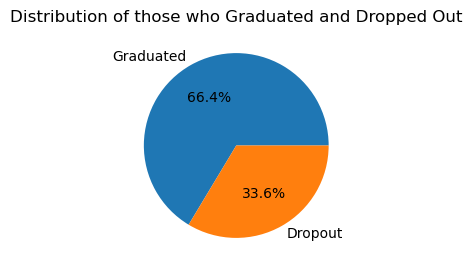

In [1113]:
#Visualization: Pie Chart
plt.figure(figsize=(5, 3))
counts = df['Target'].value_counts()
plt.pie(counts, labels=['Graduated', 'Dropout'], autopct='%1.1f%%')
plt.title('Distribution of those who Graduated and Dropped Out')

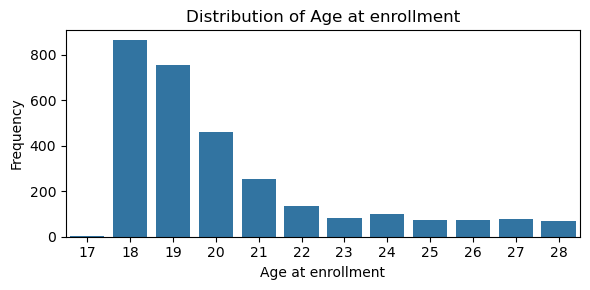

In [1114]:
#Visualization: Count Plot
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Age at enrollment')
plt.title("Distribution of Age at enrollment")  # Title
plt.xlabel('Age at enrollment')  # x-axis label
plt.ylabel('Frequency')  # y-axis label
plt.tight_layout()
plt.savefig('Ages.png')
plt.show()

Text(0, 0.5, 'Average grade in the first semester\n (passing mark of 10)')

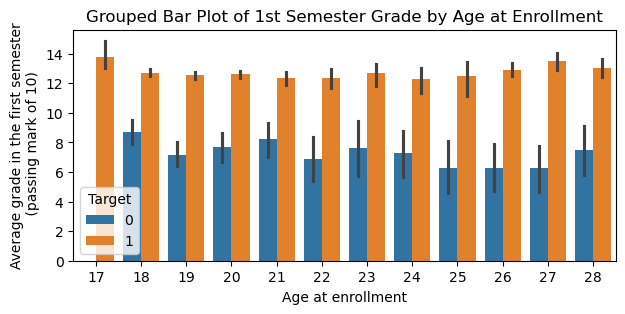

In [1115]:
#Visualization: Grouped Bar Plot
plt.figure(figsize=(7, 3))
sns.barplot(data=df, x='Age at enrollment', y='Curricular units 1st sem (grade)', hue='Target') 
plt.title('Grouped Bar Plot of 1st Semester Grade by Age at Enrollment')
plt.ylabel('Average grade in the first semester\n (passing mark of 10)')

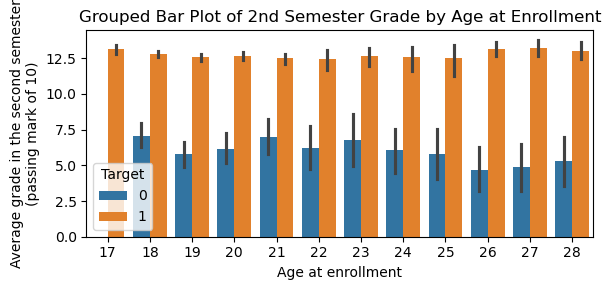

In [1116]:
#Visualization: Grouped Bar Plot
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Age at enrollment', y='Curricular units 2nd sem (grade)', hue='Target') 
plt.title('Grouped Bar Plot of 2nd Semester Grade by Age at Enrollment')
plt.ylabel('Average grade in the second semester\n(passing mark of 10)')
plt.tight_layout()
plt.savefig('2nd_SemGrade.png')

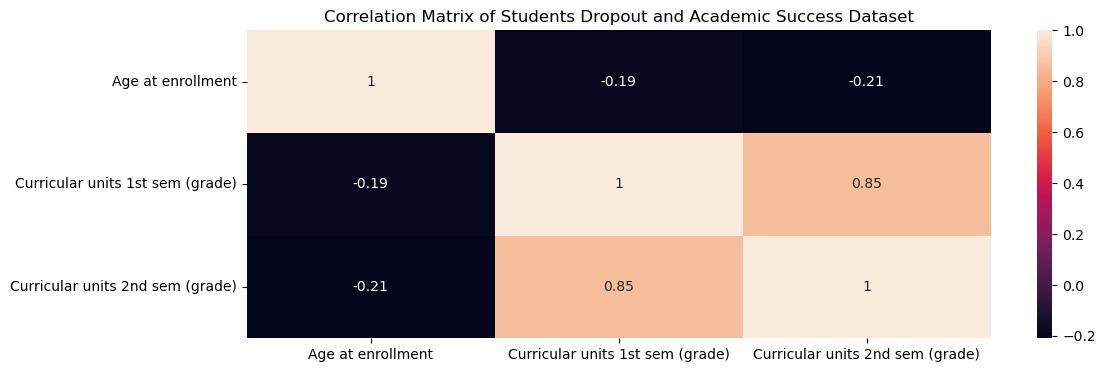

In [1117]:
#Feature Correlation
numeric_cols = ["Age at enrollment", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Students Dropout and Academic Success Dataset')
plt.show()

After cleaning the dataset, I focused on 3,630 student records who either graduated or dropped out, excluding those still enrolled. I subsetted the data to 15 variables, including demographic, socioeconomic, and academic features. There were no missing values, and most features were encoded as categorical integers, except for first and second semester grades, which use continuous floating values. Descriptive statistics showed an average enrollment age of 23 and average grades around 10 out of 20, which is a passing but low score. Outlier analysis revealed that students aged 47 or older skewed the age distribution. Additionally, the count plot of age of enrollment showed that most students enrolled between ages 18 and 21. Based on these findings, I limited the dataset to students under 29 to improve consistency.

Visualizations showed that 66.4% of students graduated while 33.6% dropped out. Grouped bar plots indicated that students who dropped out had significantly lower grades and experienced a decline from the first to the second semester, whereas students who graduated maintained more consistent high performance. Interestingly, age at enrollment had little effect on academic performance, with grade distributions appearing stable across age groups. A feature correlation analysis indicated a strong relationship between first and second semester grades (r = 0.85), suggesting academic consistency is a key predictor of graduation.

#### Data Preprocessing

##### Train-Test Split

In [1121]:
#Features and Target
X = df.drop('Target', axis=1)
y = df['Target']

In [1122]:
#One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['Marital status', 'Course','Previous qualification', 
                                       "Mother's qualification","Father's qualification"], dtype=int)
X_encoded.head()

Daytime&evening attendance  Educational special needs  Debtor  Gender  \
0                           1                          0       0       1   
1                           1                          0       0       1   
2                           1                          0       0       1   
3                           1                          0       0       0   
6                           1                          0       0       0   

   Scholarship holder  Age at enrollment  International  \
0                   0                 20              0   
1                   0                 19              0   
2                   0                 19              0   
3                   0                 20              0   
6                   1                 18              0   

   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                          0.000000                          0.000000   
1                         14.000000                         13.666667   
2                          0.000000                          0.000000   
3                         13.428571                         12.400000   
6                         13.300000                         14.345000   

   Marital status_1  ...  Mother's qualification_0  Mother's qualification_1  \
0                 1  ...                         0                         1   
1                 1  ...                         0                         1   
2                 1  ...                         0                         1   
3                 1  ...                         0                         1   
6                 1  ...                         0                         1   

   Mother's qualification_2  Mother's qualification_3  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
6                         0                         0   

   Mother's qualification_4  Father's qualification_0  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
6                         0                         0   

   Father's qualification_1  Father's qualification_2  \
0                         1                         0   
1                         0                         0   
2                         1                         0   
3                         1                         0   
6                         1                         0   

   Father's qualification_3  Father's qualification_4  
0                         0                         0  
1                         1                         0  
2                         0                         0  
3                         0                         0  
6                         0                         0  

[5 rows x 45 columns]

In [1123]:
#Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2211, 45), (737, 45), (2211,), (737,))

##### Feature Scaling

In [1125]:
#For Log Regression Only
#Use `StandardScaler` from scikit-learn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit the scaler on the training data and transform both the training and testing data.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Display the first 5 rows of the scaled training data.
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
display("First 5 rows of scaled training data:\n", df_train_scaled.head())

'First 5 rows of scaled training data:\n'

Daytime&evening attendance  Educational special needs    Debtor    Gender  \
0                    0.221046                  -0.106941 -0.341565 -0.659380   
1                    0.221046                  -0.106941 -0.341565 -0.659380   
2                    0.221046                  -0.106941 -0.341565  1.516575   
3                    0.221046                  -0.106941 -0.341565 -0.659380   
4                   -4.523938                  -0.106941 -0.341565  1.516575   

   Scholarship holder  Age at enrollment  International  \
0           -0.659380          -0.841339      -0.159719   
1            1.516575           0.319352      -0.159719   
2            1.516575          -0.454442      -0.159719   
3           -0.659380          -0.841339      -0.159719   
4           -0.659380           0.706249      -0.159719   

   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                          0.631493                          0.663650   
1                          0.596364                          0.445689   
2                         -2.312272                         -2.022401   
3                          1.270831                          1.054698   
4                          0.307307                          0.246959   

   Marital status_1  ...  Mother's qualification_0  Mother's qualification_1  \
0          0.140833  ...                 -0.021272                  0.447578   
1          0.140833  ...                 -0.021272                  0.447578   
2          0.140833  ...                 -0.021272                  0.447578   
3          0.140833  ...                 -0.021272                  0.447578   
4          0.140833  ...                 -0.021272                 -2.234249   

   Mother's qualification_2  Mother's qualification_3  \
0                 -0.060261                 -0.398503   
1                 -0.060261                 -0.398503   
2                 -0.060261                 -0.398503   
3                 -0.060261                 -0.398503   
4                 -0.060261                  2.509388   

   Mother's qualification_4  Father's qualification_0  \
0                 -0.162673                  -0.03686   
1                 -0.162673                  -0.03686   
2                 -0.162673                  -0.03686   
3                 -0.162673                  -0.03686   
4                 -0.162673                  -0.03686   

   Father's qualification_1  Father's qualification_2  \
0                  0.365055                 -0.060261   
1                  0.365055                 -0.060261   
2                  0.365055                 -0.060261   
3                  0.365055                 -0.060261   
4                  0.365055                 -0.060261   

   Father's qualification_3  Father's qualification_4  
0                 -0.320536                 -0.140833  
1                 -0.320536                 -0.140833  
2                 -0.320536                 -0.140833  
3                 -0.320536                 -0.140833  
4                 -0.320536                 -0.140833  

[5 rows x 45 columns]

In the EDA, I addressed outliers in the Age at enrollment variable. Although the dataset contained no missing values, outlier analysis revealed that some students were as old as 70, which skewed the age distribution. Since the majority of students enrolled between ages 18 and 21, I filtered the dataset to include only those under 29. This adjustment removed outliers, improved data consistency, and aligned the analysis with a more traditional college-aged population.

Of the 12 categorical variables, 7 were binary and used directly, while the remaining 5 (Marital status, Course, Previous qualification, Mother's qualification, and Father's qualification) were nominal and required one-hot encoding to treat each category independently. One-hot encoding was applied before splitting the data to maintain consistency across the training and test sets. Given the binary classification objective (predicting whether a student graduates or drops out) and the dataset’s structure, I selected a Random Forest model. This model is ideal for structured data, handles both categorical and numerical features effectively, is robust to outliers, and does not require feature scaling. Additionally, they provide useful insights through feature importance, which can support interpretation and inform educational intervention strategies. However, to prepare for comparison with Logistic Regression, I used StandardScaler to standardize the numerical features. The scaler was fit on the training set and applied to both training and testing sets, ensuring proper normalization.

#### Model Selection and Training

In [1128]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

#Logistic Regression: Baseline Performance
lr_model = LogisticRegression(max_iter=1000, random_state=0)
lr_model.fit(X_train_scaled, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

This project involves a binary classification problem: predicting whether a student will graduate or drop out based on demographic, socioeconomic, and academic performance data. The dataset includes 3,630 observations and contains a mix of numerical and categorical variables, which were preprocessed through filtering, recoding, and one-hot encoding where needed. Because of the structured nature of the data and the importance of both model performance and interpretability in educational research, I selected three classification models to explore: Random Forest, Logistic Regression, and Gradient Boosting. These models vary in complexity and offer different strengths, making them well-suited for comparison and evaluation.
    
The first model, Random Forest, was selected because of its ability to handle both categorical and numerical data effectively without requiring feature scaling. It is also robust to outliers and provides built-in measures of feature importance, making it a good fit for datasets like this one. Logistic Regression was chosen because of its simplicity, computational efficiency, and high interpretability. It provides clear coefficients for each feature, which helps in understanding the impact of different variables on student outcomes. Since Logistic Regression is sensitive to feature scale, the numerical features were standardized using scikit-learn’s StandardScaler. Finally, I selected a Gradient Boosting model for its high predictive performance and ability to model complex, non-linear interactions between features. Although it is more computationally intensive and requires careful tuning to avoid overfitting, it often outperforms simpler models in classification tasks with structured data. These three models together allow for a balanced comparison between interpretability, accuracy, and computational efficiency in predicting student academic outcomes.

#### Model Preliminary Evaluation

In [1131]:
#Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("Accuracy on training set: {:.3f}".format(rf_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_model.score(X_test, y_test)))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

#Logistic Regression: Baseline Performance
y_pred_lr = lr_model.predict(X_test_scaled)
print("\nLogistic Regression Performance (Baseline):")
print("Accuracy on training set: {:.3f}".format(lr_model.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(lr_model.score(X_test_scaled, y_test)))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

#Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting Performance:")
print("Accuracy on training set: {:.3f}".format(gb_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb_model.score(X_test, y_test)))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Random Forest Performance:
Accuracy on training set: 0.991
Accuracy on test set: 0.851
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       253
           1       0.85      0.94      0.89       484

    accuracy                           0.85       737
   macro avg       0.85      0.81      0.82       737
weighted avg       0.85      0.85      0.85       737


Logistic Regression Performance (Baseline):
Accuracy on training set: 0.883
Accuracy on test set: 0.840
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       253
           1       0.85      0.92      0.88       484

    accuracy                           0.84       737
   macro avg       0.83      0.81      0.82       737
weighted avg       0.84      0.84      0.84       737


Gradient Boosting Performance:
Accuracy on training set: 0.905
Accuracy 

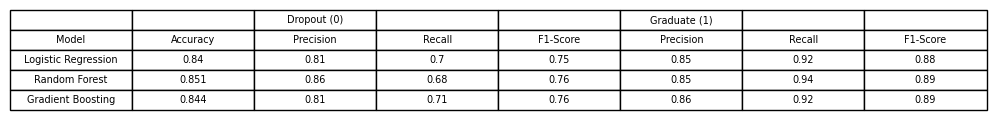

In [1213]:
#The following formats the results
columns = [
    ["", "", "Dropout (0)", "", "", "Graduate (1)", "", ""],
    ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Precision", "Recall", "F1-Score"]
]
data = [
    ["Logistic Regression", 0.840, 0.81, 0.70, 0.75, 0.85, 0.92, 0.88],
    ["Random Forest",       0.851, 0.86, 0.68, 0.76, 0.85, 0.94, 0.89],
    ["Gradient Boosting",   0.844, 0.81, 0.71, 0.76, 0.86, 0.92, 0.89]
]
table = [columns[0], columns[1]] + data

fig, ax = plt.subplots(figsize=(9, 1))
ax.axis('off')
table = ax.table(cellText=table, cellLoc='center', loc='center')
table.scale(1.4, 1.2)
plt.savefig("ClassificationReport.png", bbox_inches='tight')
plt.show()

The Random Forest model achieved the highest accuracy at 85.1%, closely followed by Gradient Boosting with an accuracy of 84.4%. Both models demonstrated solid performance, with precision ranging from 0.81 to 0.86, recall between 0.68 and 0.94, and strong F1-scores of 0.89 for the graduating class and 0.76 for the dropout class. In contrast, Logistic Regression had the lowest test accuracy at 84%. However, it had the best precision for the graduate class and overall good classfication metrics.

Given these results, Random Forest is the most promising model for this binary classification task. Its ability to handle complex, nonlinear relationships, and mixed data types (categorical and numerical) likely contributes to their strong performance. These results could be enhanced with feature selection and grid search.

#### Model Optimization & Final Model Evaluation

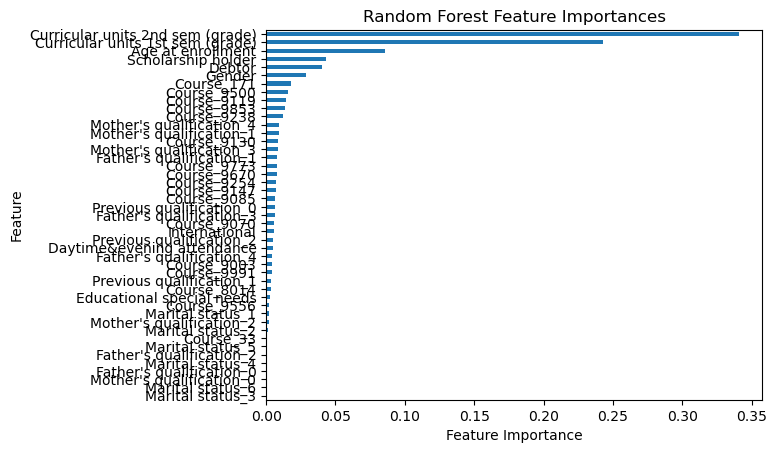

Accuracy on test set with selected features: 0.8398914518317503

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74       253
           1       0.84      0.93      0.88       484

    accuracy                           0.84       737
   macro avg       0.84      0.80      0.81       737
weighted avg       0.84      0.84      0.83       737



In [1135]:
#Visualize the feature importances using a bar chart
pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values().plot.barh()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.show()

#Feature Selection
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

rf_selected = RandomForestClassifier(random_state=0)
rf_selected.fit(X_train_selected, y_train)

y_pred = rf_selected.predict(X_test_selected)

print("Accuracy on test set with selected features:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

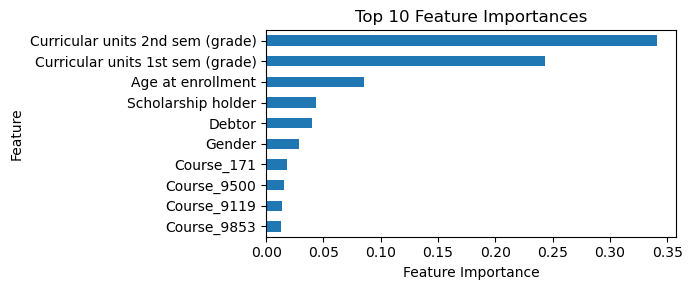

In [1136]:
top10 = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top10.nlargest(10).sort_values().plot.barh(figsize=(7,3))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.savefig('FeatureImportances.png')

In [1137]:
#Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [100, 150, 200, 250], 'max_features': [5, 10, 20, 30]},
    {'bootstrap': [False], 'n_estimators':[100, 150, 200], 'max_features':[5, 10, 20]}
]
grid_search_rf = GridSearchCV(rf_selected, param_grid, cv=5,
                              scoring='accuracy',
                              return_train_score=True)
grid_search_rf.fit(X_train_selected, y_train)
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-val score:", grid_search_rf.best_score_)

Best parameters: {'max_features': 10, 'n_estimators': 150}
Best cross-val score: 0.867476992533426


In [1138]:
# Get the best estimator from the grid search
best_rf_model = grid_search_rf.best_estimator_
# Predict on the test set
y_pred = best_rf_model.predict(X_test_selected)

# Print classification report
print("Classification Report for Random Forest (Optimized):")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest (Optimized):
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       253
           1       0.85      0.94      0.89       484

    accuracy                           0.85       737
   macro avg       0.85      0.81      0.82       737
weighted avg       0.85      0.85      0.84       737

